In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


plt.figure(figsize=(10,5))
sns.set_style("whitegrid")


<Figure size 1000x500 with 0 Axes>

In [3]:
amazon_india_2015_2025 = pd.read_csv("C:\\Users\\DVK\\Desktop\\Amazon_decade_Sales_project\\notebooks\\amazon_india_cleaned_2015_2025.csv")
amazon_india_2015_2025['order_date'] = pd.to_datetime(amazon_india_2015_2025['order_date'])

##### 1.Revenue Trend Analysis with Yearly Growth Rates and Trend Lines (2015–2025)

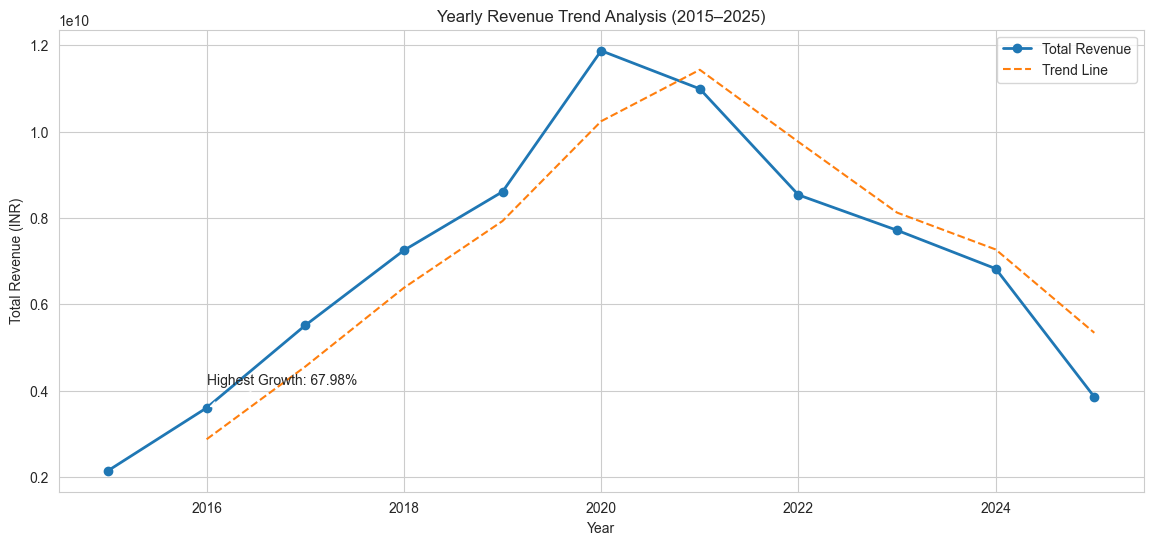

,order_year,final_amount_inr,yoy_growth_pct,trend
0,2015,2.142163e+09,NaN,NaN
1,2016,3.598316e+09,67.98,2.870240e+09
2,2017,5.510026e+09,53.13,4.554171e+09
3,2018,7.248545e+09,31.55,6.379285e+09
4,2019,8.605901e+09,18.73,7.927223e+09
5,2020,1.187319e+10,37.97,1.023955e+10
6,2021,1.099021e+10,-7.44,1.143170e+10
7,2022,8.532312e+09,-22.36,9.761261e+09
8,2023,7.712999e+09,-9.60,8.122656e+09
9,2024,6.823413e+09,-11.53,7.268206e+09


In [5]:


# 1️⃣ Aggregate yearly revenue
yearly_revenue = (
    amazon_india_2015_2025
    .groupby('order_year')['final_amount_inr']
    .sum()
    .reset_index()
    .sort_values('order_year')
)

# 2️⃣ Calculate YoY growth %
yearly_revenue['yoy_growth_pct'] = (
    yearly_revenue['final_amount_inr']
    .pct_change() * 100
).round(2)

# 3️⃣ Trend line (rolling mean)
yearly_revenue['trend'] = (
    yearly_revenue['final_amount_inr']
    .rolling(window=2)
    .mean()
)

# 4️⃣ Identify highest growth year
max_growth = yearly_revenue.loc[
    yearly_revenue['yoy_growth_pct'].idxmax()
]

# 5️⃣ Plot
plt.figure(figsize=(14,6))

plt.plot(
    yearly_revenue['order_year'],
    yearly_revenue['final_amount_inr'],
    marker='o',
    linewidth=2,
    label='Total Revenue'
)

plt.plot(
    yearly_revenue['order_year'],
    yearly_revenue['trend'],
    linestyle='--',
    label='Trend Line'
)

# Annotation
plt.annotate(
    f"Highest Growth: {max_growth['yoy_growth_pct']}%",
    xy=(max_growth['order_year'], max_growth['final_amount_inr']),
    xytext=(max_growth['order_year'], max_growth['final_amount_inr'] * 1.15),
    arrowprops=dict(arrowstyle='->')
)

plt.title('Yearly Revenue Trend Analysis (2015–2025)')
plt.xlabel('Year')
plt.ylabel('Total Revenue (INR)')
plt.legend()
plt.grid(True)

plt.show()

# 6️⃣ Final table output
yearly_revenue


##### 2.Seasonal Sales Trend Analysis Using Monthly Heatmaps

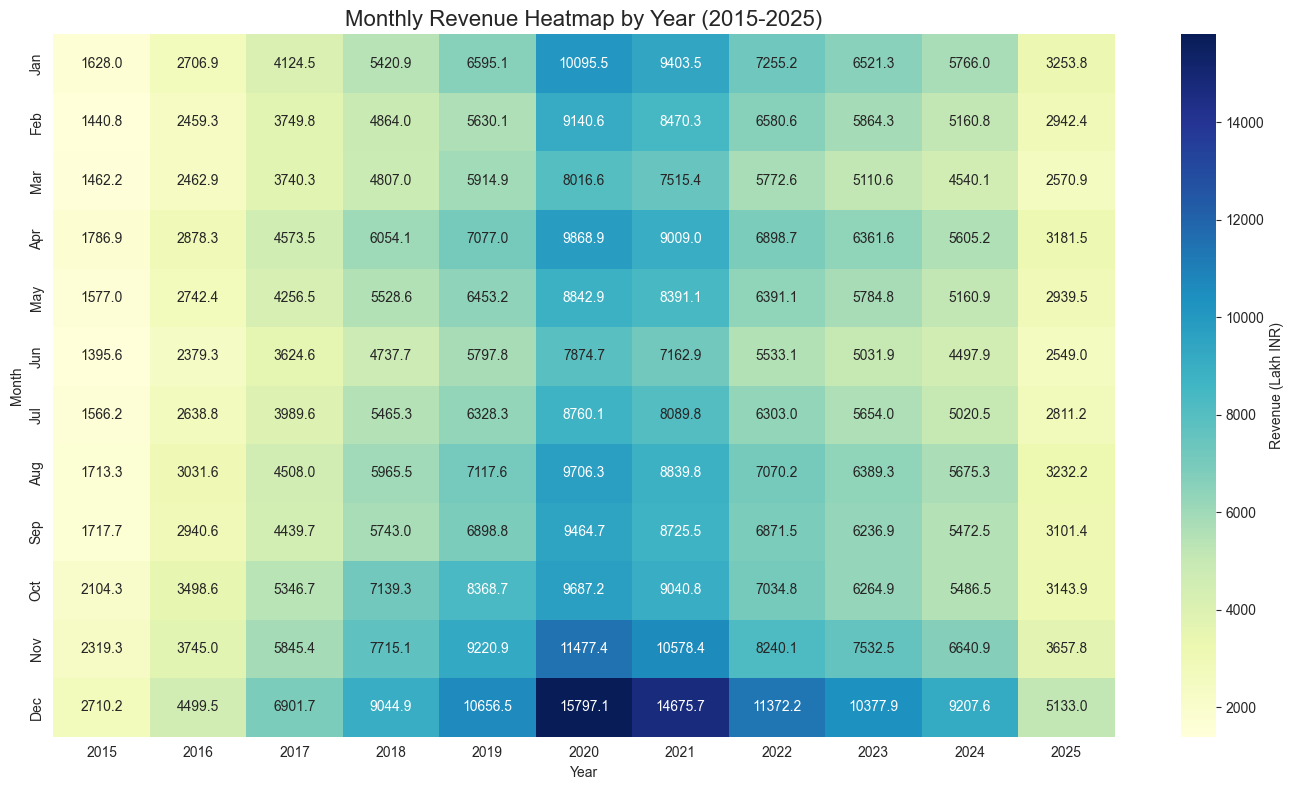

C:\Users\DVK\AppData\Local\Temp\ipykernel_13932\799746029.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_total, x='month_name', y='final_amount_lakh', palette='viridis')


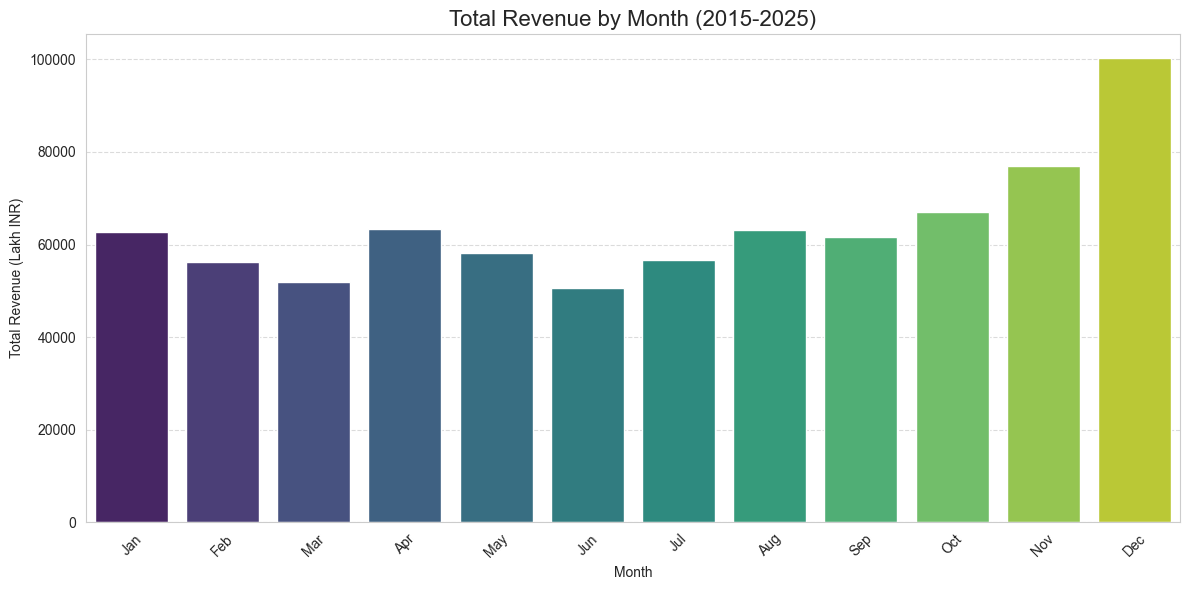

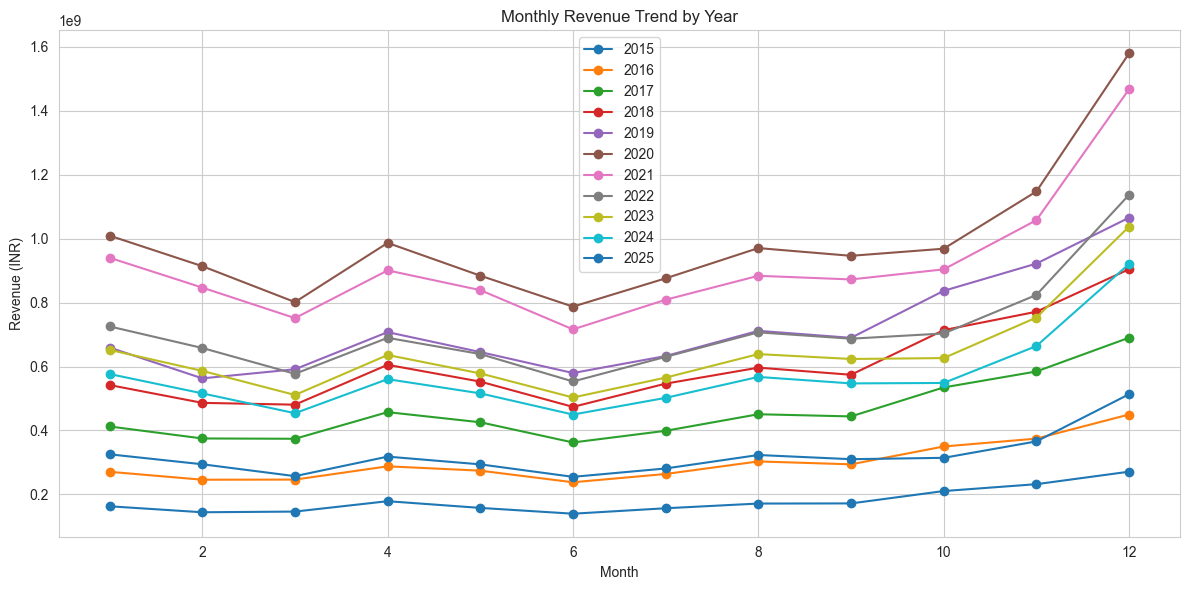


  PEAK MONTH BY CATEGORY:
  Electronics: Dec (₹10,035,295,303)
  Electronics & Accessories: Dec (₹2,332,034)


In [6]:
# --- STEP 1: Month Names ---
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# --- STEP 2: Prepare Data ---
amazon_india_2015_2025['order_date'] = pd.to_datetime(amazon_india_2015_2025['order_date'], errors='coerce')
amazon_india_2015_2025['year'] = amazon_india_2015_2025['order_date'].dt.year
amazon_india_2015_2025['month'] = amazon_india_2015_2025['order_date'].dt.month

# Convert revenue to lakhs for clean visualization
amazon_india_2015_2025['final_amount_lakh'] = amazon_india_2015_2025['final_amount_inr'] / 1_00_000

# --- STEP 3: Monthly Revenue Heatmap by Year ---
monthly_sales_pivot = amazon_india_2015_2025.pivot_table(
    index='month',
    columns='year',
    values='final_amount_lakh',
    aggfunc='sum'
)

plt.figure(figsize=(14, 8))
sns.heatmap(monthly_sales_pivot, cmap='YlGnBu', annot=True, fmt=".1f", 
            yticklabels=month_names, cbar_kws={'label':'Revenue (Lakh INR)'})
plt.title("Monthly Revenue Heatmap by Year (2015-2025)", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Month")
plt.tight_layout()
plt.show()

# --- STEP 4: Total Revenue by Month Across All Years ---
monthly_total = amazon_india_2015_2025.groupby('month')['final_amount_lakh'].sum().reset_index()
monthly_total['month_name'] = monthly_total['month'].map(lambda x: month_names[x-1])

plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_total, x='month_name', y='final_amount_lakh', palette='viridis')
plt.title('Total Revenue by Month (2015-2025)', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Total Revenue (Lakh INR)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# --- STEP 5: Monthly Revenue Trend per Year ---
plt.figure(figsize=(12, 6))
for year in sorted(amazon_india_2015_2025['year'].unique()):
    monthly = amazon_india_2015_2025[amazon_india_2015_2025['year'] == year].groupby('month')['final_amount_inr'].sum()
    plt.plot(monthly.index, monthly.values, marker='o', label=str(year))
plt.title('Monthly Revenue Trend by Year')
plt.xlabel('Month')
plt.ylabel('Revenue (INR)')
plt.legend()
plt.tight_layout()
plt.show()

# --- STEP 6: Peak Month for Each Category ---
category_peaks = amazon_india_2015_2025.groupby(['category', 'month'])['final_amount_inr'].sum().reset_index()
idx = category_peaks.groupby('category')['final_amount_inr'].idxmax()
peak_per_category = category_peaks.loc[idx]

print("\n  PEAK MONTH BY CATEGORY:")
for _, row in peak_per_category.iterrows():
    month_name = month_names[row['month']-1]  # month_names list starts at 0
    print(f"  {row['category']}: {month_name} (₹{row['final_amount_inr']:,.0f})")



# 3.Customer Segmentation Using RFM (Recency, Frequency, Monetary) Analysis

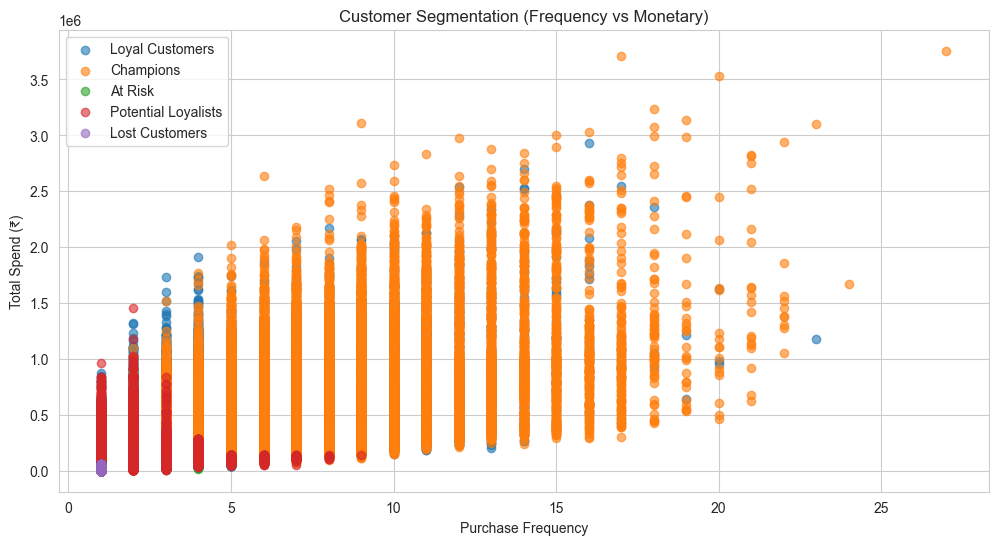

,customers,avg_recency,avg_frequency,avg_monetary
segment,,,,
Potential Loyalists,100827,1354.865671,2.045256,113811.717564
Loyal Customers,98587,1384.852110,3.754491,272109.609590
Champions,78328,770.346709,5.807923,436721.383036
At Risk,62224,1797.781451,1.306923,62448.300608
Lost Customers,15003,2532.536626,1.000000,32904.744938


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# ===============================
# 1️⃣ Reference Date (latest order)
# ===============================
snapshot_date = amazon_india_2015_2025['order_date'].max() + pd.Timedelta(days=1)

# ===============================
# 2️⃣ Build RFM Table
# ===============================
rfm = (
    amazon_india_2015_2025
    .groupby('customer_id')
    .agg({
        'order_date': lambda x: (snapshot_date - x.max()).days,   # Recency
        'transaction_id': 'count',                                # Frequency
        'final_amount_inr': 'sum'                                 # Monetary
    })
    .reset_index()
)

rfm.columns = ['customer_id', 'recency', 'frequency', 'monetary']

# ===============================
# 3️⃣ RFM Scoring (BULLETPROOF)
# ===============================

# Recency (lower is better → reverse labels)
rfm['R_score'] = pd.qcut(
    rfm['recency'].rank(method='first'),
    4,
    labels=[4,3,2,1]
)

# Frequency (higher is better)
rfm['F_score'] = pd.qcut(
    rfm['frequency'].rank(method='first'),
    4,
    labels=[1,2,3,4]
)

# Monetary (higher is better)
rfm['M_score'] = pd.qcut(
    rfm['monetary'].rank(method='first'),
    4,
    labels=[1,2,3,4]
)

rfm[['R_score','F_score','M_score']] = (
    rfm[['R_score','F_score','M_score']]
    .astype(int)
)

rfm['RFM_score'] = (
    rfm['R_score'] +
    rfm['F_score'] +
    rfm['M_score']
)


# ===============================
# 4️⃣ Customer Segments
# ===============================
def segment_customer(score):
    if score >= 10:
        return 'Champions'
    elif score >= 8:
        return 'Loyal Customers'
    elif score >= 6:
        return 'Potential Loyalists'
    elif score >= 4:
        return 'At Risk'
    else:
        return 'Lost Customers'

rfm['segment'] = rfm['RFM_score'].apply(segment_customer)

# ===============================
# 5️⃣ Scatter Plot: Frequency vs Monetary
# ===============================
plt.figure(figsize=(12,6))

for seg in rfm['segment'].unique():
    temp = rfm[rfm['segment'] == seg]
    plt.scatter(
        temp['frequency'],
        temp['monetary'],
        alpha=0.6,
        label=seg
    )

plt.title('Customer Segmentation (Frequency vs Monetary)')
plt.xlabel('Purchase Frequency')
plt.ylabel('Total Spend (₹)')
plt.legend()
plt.grid(True)

plt.show()

# ===============================
# 6️⃣ Segment Summary Table
# ===============================
segment_summary = (
    rfm
    .groupby('segment')
    .agg(
        customers=('customer_id', 'count'),
        avg_recency=('recency', 'mean'),
        avg_frequency=('frequency', 'mean'),
        avg_monetary=('monetary', 'mean')
    )
    .sort_values('customers', ascending=False)
)

segment_summary


# 4.Evolution of Payment Methods and Market Share Trends (2015–2025)

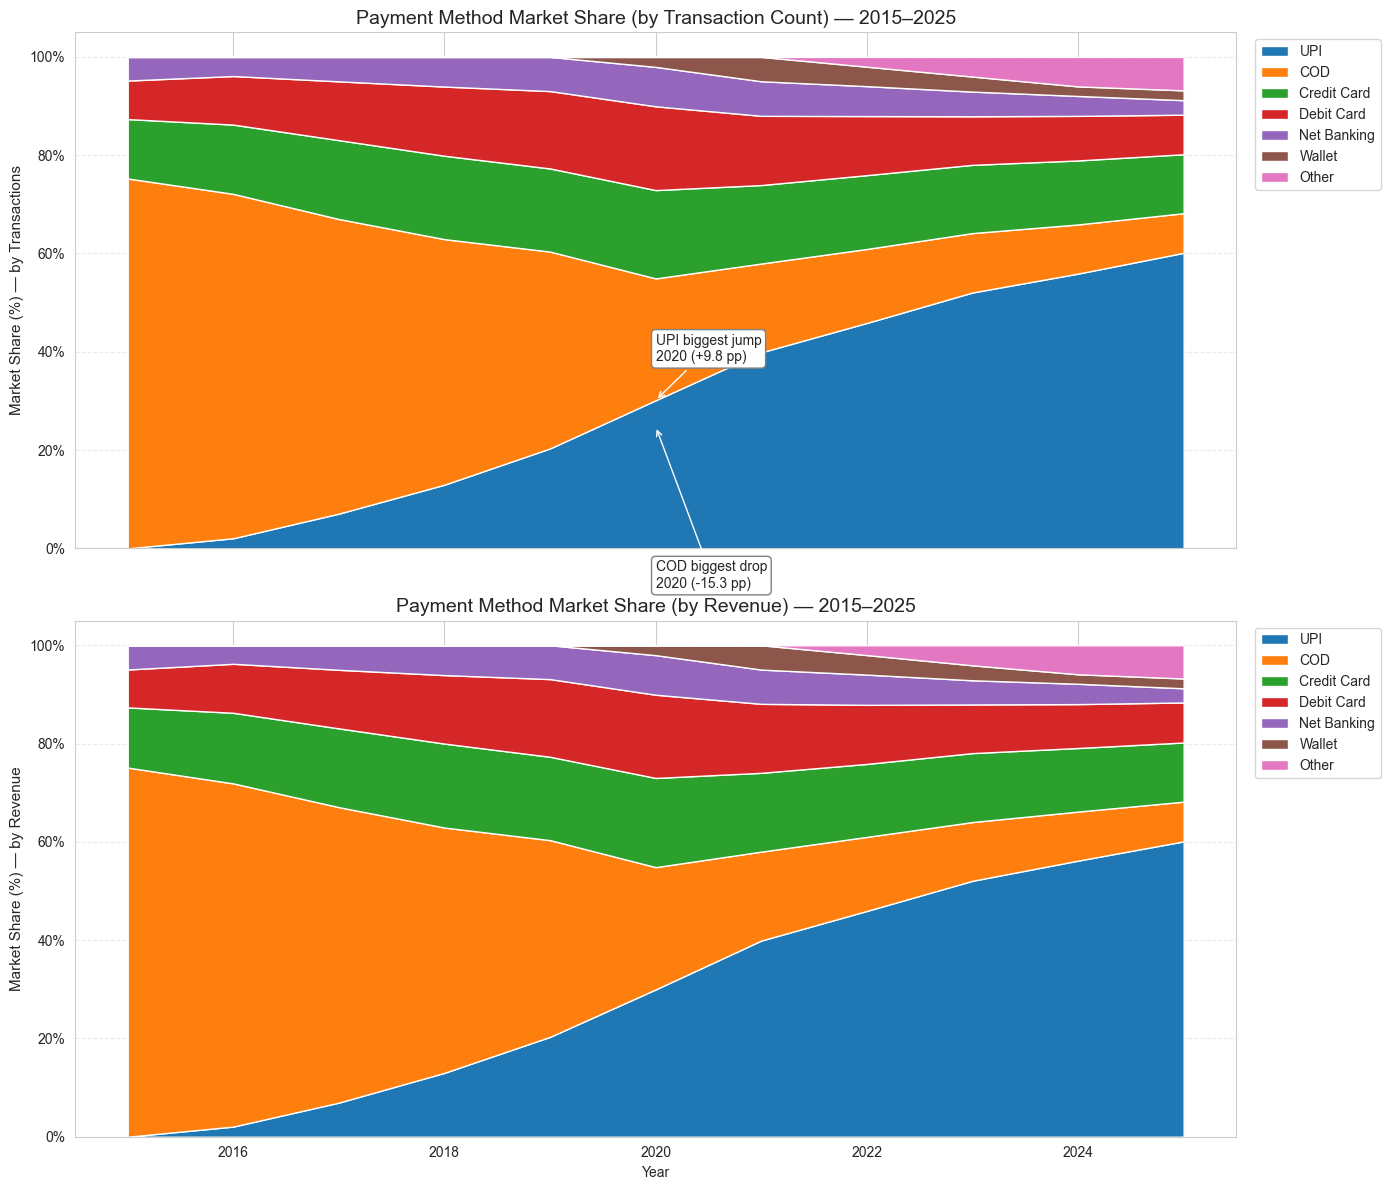


Top payment methods by total transactions (2015-2025):
payment_method
UPI            384228.0
COD            322831.0
Credit Card    172261.0
Debit Card     140202.0
Net Banking     64971.0
Wallet          22821.0
Other           20295.0
dtype: float64

Sample: Year-wise UPI & COD % (if present):


payment_method,UPI,COD
order_year,,
2015,0.00,75.27
2016,2.06,70.08
2017,7.07,59.94
2018,12.96,49.96
2019,20.34,40.04
2020,30.13,24.79
2021,39.89,18.07
2022,45.87,15.06
2023,52.07,12.09



Insights:
- UPI change (2015→2025): 60.1 percentage points (by transactions).
- COD change (2015→2025): -67.2 percentage points (by transactions).


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

# ---------------------------
# CONFIG / SAFETY
# ---------------------------
# Ensure order_year and payment_method exist
df = amazon_india_2015_2025  # adjust name if needed
assert 'order_year' in df.columns and 'payment_method' in df.columns

# ---------------------------
# 1) Prepare counts and revenue by year x payment_method
# ---------------------------
# Optionally limit to years 2015-2025 if dataset contains other years
years_mask = (df['order_year'] >= 2015) & (df['order_year'] <= 2025)
data = df.loc[years_mask, :].copy()

# Count-based market share
count_tbl = (
    data
    .groupby(['order_year', 'payment_method'])['transaction_id']
    .count()
    .rename('tx_count')
    .reset_index()
)

pivot_count = count_tbl.pivot(index='order_year', columns='payment_method', values='tx_count').fillna(0)

# Revenue-based market share (alternate view)
rev_tbl = (
    data
    .groupby(['order_year', 'payment_method'])['final_amount_inr']
    .sum()
    .rename('revenue')
    .reset_index()
)
pivot_rev = rev_tbl.pivot(index='order_year', columns='payment_method', values='revenue').fillna(0)

# ---------------------------
# 2) Consolidate small columns into "Other"
# ---------------------------
def consolidate_small_columns(pivot_df, top_n=6):
    # pick top_n methods by cumulative share across years
    totals = pivot_df.sum().sort_values(ascending=False)
    top = totals.head(top_n).index.tolist()
    others = [c for c in pivot_df.columns if c not in top]
    df_top = pivot_df[top].copy()
    if others:
        df_top['Other'] = pivot_df[others].sum(axis=1)
    return df_top

top_n = 6
pc = consolidate_small_columns(pivot_count, top_n=top_n)
pr = consolidate_small_columns(pivot_rev, top_n=top_n)

# Sort columns so UPI and COD (if present) are easy to find and order is consistent
cols_order = [c for c in pc.columns if c in ['UPI', 'COD']] + [c for c in pc.columns if c not in ['UPI', 'COD']]
pc = pc[cols_order]
pr = pr[[c for c in cols_order if c in pr.columns]]  # align revenue pivot columns similarly if exists

# ---------------------------
# 3) Convert to % market share by year
# ---------------------------
pc_share = pc.div(pc.sum(axis=1), axis=0)*100
pr_share = pr.div(pr.sum(axis=1), axis=0)*100

years = pc_share.index.values

# ---------------------------
# 4) Find key inflection years for annotations
# ---------------------------
def first_large_change(series_pct, direction='increase', top_k=1):
    # compute year-over-year change in percentage points
    diff = series_pct.diff().fillna(0)
    if direction == 'increase':
        idx = diff.idxmax()
    else:
        idx = diff.idxmin()
    return idx, diff.loc[idx]

upi_year = (None, None)
cod_year = (None, None)
if 'UPI' in pc_share.columns:
    upi_year = first_large_change(pc_share['UPI'], 'increase')
if 'COD' in pc_share.columns:
    cod_year = first_large_change(pc_share['COD'], 'decrease')

# ---------------------------
# 5) Plot stacked area charts (count-share and revenue-share)
# ---------------------------
fig, axes = plt.subplots(2, 1, figsize=(14,12), sharex=True)

# A) Count-based market share stacked area
ax = axes[0]
labels = pc_share.columns.tolist()
yvals = [pc_share[c].values for c in labels]
ax.stackplot(years, yvals, labels=labels)
ax.set_ylabel('Market Share (%) — by Transactions', fontsize=11)
ax.yaxis.set_major_formatter(PercentFormatter(100))
ax.set_title('Payment Method Market Share (by Transaction Count) — 2015–2025', fontsize=14)
ax.grid(axis='y', linestyle='--', alpha=0.4)

# Annotate UPI rise and COD decline if present
if upi_year[0] is not None:
    ax.annotate(
        f"UPI biggest jump\n{upi_year[0]} (+{upi_year[1]:.1f} pp)",
        xy=(upi_year[0], pc_share.loc[upi_year[0], 'UPI']),
        xytext=(upi_year[0], pc_share.loc[upi_year[0]].max()+8),
        arrowprops=dict(arrowstyle='->'),
        fontsize=10,
        bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="0.5")
    )
if cod_year[0] is not None:
    ax.annotate(
        f"COD biggest drop\n{cod_year[0]} ({cod_year[1]:.1f} pp)",
        xy=(cod_year[0], pc_share.loc[cod_year[0], 'COD']),
        xytext=(cod_year[0], pc_share.loc[cod_year[0]].min()-8),
        arrowprops=dict(arrowstyle='->'),
        fontsize=10,
        bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="0.5")
    )

ax.legend(loc='upper left', bbox_to_anchor=(1.01, 1))

# B) Revenue-based market share stacked area
ax = axes[1]
labels_rev = pr_share.columns.tolist()
yvals_rev = [pr_share[c].values for c in labels_rev]
ax.stackplot(years, yvals_rev, labels=labels_rev)
ax.set_ylabel('Market Share (%) — by Revenue', fontsize=11)
ax.yaxis.set_major_formatter(PercentFormatter(100))
ax.set_title('Payment Method Market Share (by Revenue) — 2015–2025', fontsize=14)
ax.grid(axis='y', linestyle='--', alpha=0.4)
ax.legend(loc='upper left', bbox_to_anchor=(1.01, 1))

plt.xlabel('Year')
plt.tight_layout()
plt.show()

# ---------------------------
# 6) Show summary tables for interpretation
# ---------------------------
print("\nTop payment methods by total transactions (2015-2025):")
print(pc.sum().sort_values(ascending=False).head(10))

print("\nSample: Year-wise UPI & COD % (if present):")
cols_to_show = [c for c in ['UPI','COD'] if c in pc_share.columns]
display(pc_share[cols_to_show].round(2))

# ---------------------------
# 7) Short textual insights (print)
# ---------------------------
print("\nInsights:")
if 'UPI' in pc_share.columns:
    upi_trend = pc_share['UPI'].iloc[-1] - pc_share['UPI'].iloc[0]
    print(f"- UPI change (2015→2025): {upi_trend:.1f} percentage points (by transactions).")
else:
    print("- UPI not present in payment_method column.")

if 'COD' in pc_share.columns:
    cod_trend = pc_share['COD'].iloc[-1] - pc_share['COD'].iloc[0]
    print(f"- COD change (2015→2025): {cod_trend:.1f} percentage points (by transactions).")
else:
    print("- COD not present in payment_method column.")


# 5.Category-Wise Performance Analysis: Revenue Contribution, Growth Rates, and Market Share

Unique payment methods: ['COD' 'UPI' 'Debit Card' 'Credit Card' 'Net Banking' 'Wallet' 'BNPL']


<Figure size 1400x800 with 0 Axes>

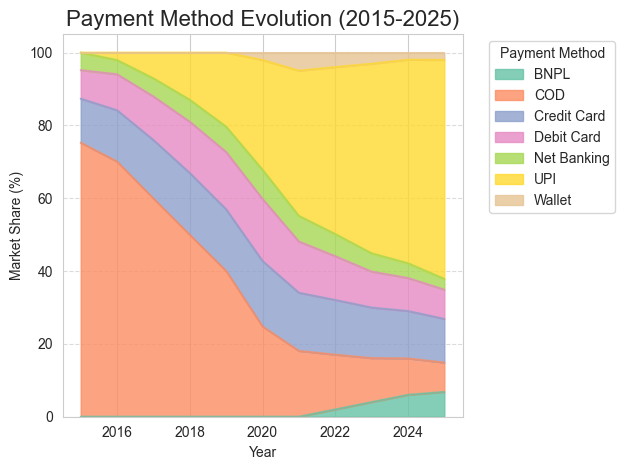

In [10]:
# STEP 1: Prepare Data
amazon_india_2015_2025['order_date'] = pd.to_datetime(amazon_india_2015_2025['order_date'], errors='coerce')
amazon_india_2015_2025['year'] = amazon_india_2015_2025['order_date'].dt.year

# Check payment methods
print("Unique payment methods:", amazon_india_2015_2025['payment_method'].unique())
# STEP 2: Aggregate Payment Counts per Year
payment_trends = amazon_india_2015_2025.groupby(['year', 'payment_method'])['transaction_id'].count().reset_index()
payment_trends.rename(columns={'transaction_id': 'count'}, inplace=True)

# Pivot for stacked area chart
payment_pivot = payment_trends.pivot(index='year', columns='payment_method', values='count').fillna(0)

# STEP 3: Convert to Market Share (%)
payment_percent = payment_pivot.div(payment_pivot.sum(axis=1), axis=0) * 100

# STEP 4: Plot Stacked Area Chart
plt.figure(figsize=(14, 8))
colors = sns.color_palette("Set2", len(payment_percent.columns))
payment_percent.plot(kind='area', stacked=True, color=colors, alpha=0.8)
plt.title('Payment Method Evolution (2015-2025)', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Market Share (%)')
plt.legend(title='Payment Method', bbox_to_anchor=(1.05, 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# 6.Impact of Prime Membership on Customer Behavior and Spending Patterns

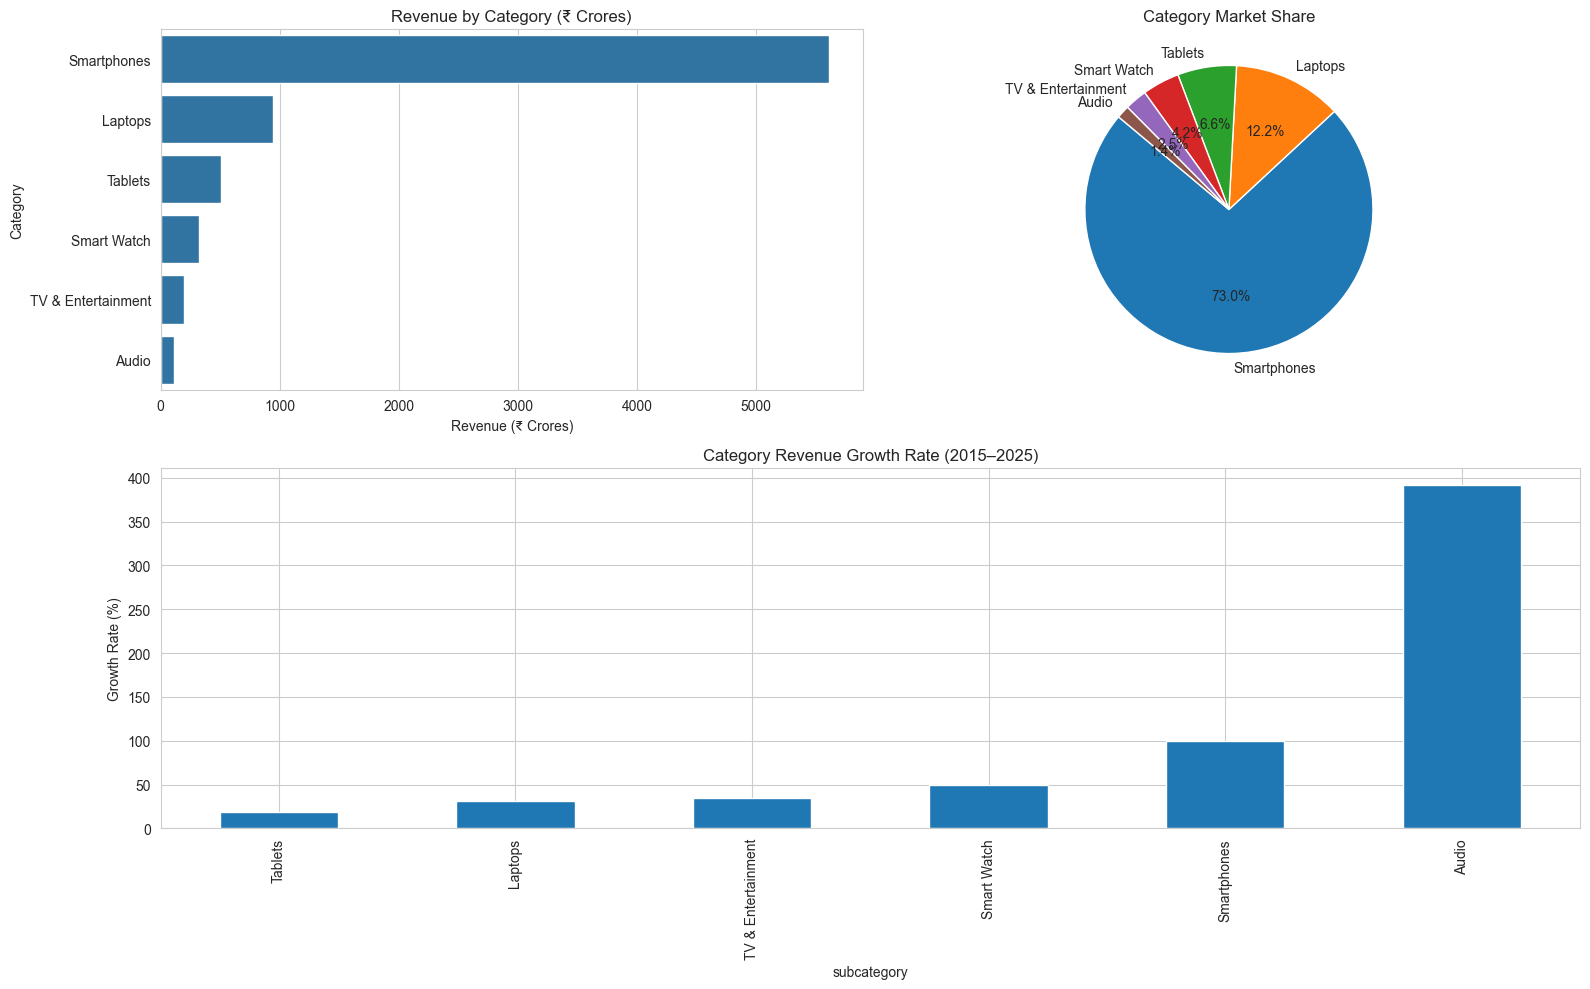

In [12]:
# Revenue by subcategory
revenue_by_category = (
    amazon_india_2015_2025
    .groupby('subcategory')['final_amount_inr']
    .sum()
    .sort_values(ascending=False)
)

# Growth rate (2015 vs 2025)
category_growth = (
    amazon_india_2015_2025[
        amazon_india_2015_2025['year'].isin([2015, 2025])
    ]
    .groupby(['subcategory', 'year'])['final_amount_inr']
    .sum()
    .unstack(fill_value=0)
)

category_growth['growth_rate_%'] = (
    (category_growth[2025] - category_growth[2015]) /
    category_growth[2015].replace(0, np.nan)
) * 100
fig = plt.figure(figsize=(16, 10))
gs = fig.add_gridspec(2, 2)

# --- Bar Chart: Revenue by Category ---
ax1 = fig.add_subplot(gs[0, 0])
sns.barplot(
    x=revenue_by_category.values / 1e7,
    y=revenue_by_category.index,
    ax=ax1
)
ax1.set_title("Revenue by Category (₹ Crores)")
ax1.set_xlabel("Revenue (₹ Crores)")
ax1.set_ylabel("Category")

# --- Pie Chart: Market Share ---
ax2 = fig.add_subplot(gs[0, 1])
ax2.pie(
    revenue_by_category,
    labels=revenue_by_category.index,
    autopct='%1.1f%%',
    startangle=140
)
ax2.set_title("Category Market Share")

# --- Bar Chart: Growth Rate ---
ax3 = fig.add_subplot(gs[1, :])
category_growth['growth_rate_%'] \
    .sort_values() \
    .plot(kind='bar', ax=ax3)

ax3.set_title("Category Revenue Growth Rate (2015–2025)")
ax3.set_ylabel("Growth Rate (%)")

plt.tight_layout()
plt.show()


# 7.

Average Order Value by Prime Membership:


,is_prime_member,average_order_value
0,False,62034.145333
1,True,78203.059163


C:\Users\DVK\AppData\Local\Temp\ipykernel_21160\2158802287.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




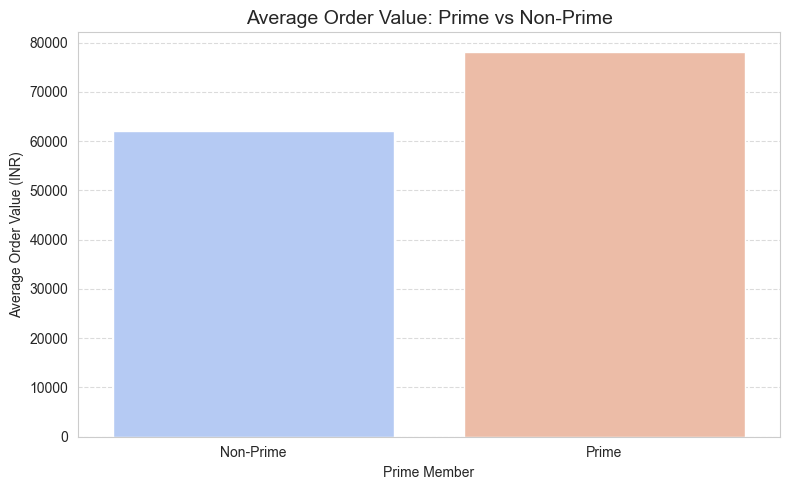


Order Frequency by Prime Membership:


,is_prime_member,order_frequency
0,False,698485
1,True,429124


C:\Users\DVK\AppData\Local\Temp\ipykernel_21160\2158802287.py:24: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




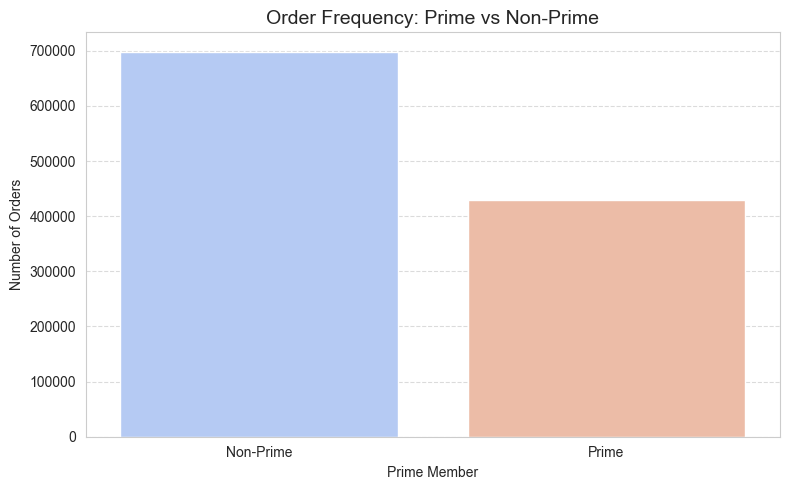


Category Preferences for Prime Members:


,is_prime_member,subcategory,total_revenue
9,True,Smartphones,2.450924e+10
7,True,Laptops,4.401329e+09
11,True,Tablets,2.122467e+09
8,True,Smart Watch,1.214830e+09
10,True,TV & Entertainment,9.459075e+08
6,True,Audio,3.650420e+08



Category Preferences for Non-Prime Members:


,is_prime_member,subcategory,total_revenue
3,False,Smartphones,3.164287e+10
1,False,Laptops,5.002704e+09
5,False,Tablets,2.960426e+09
2,False,Smart Watch,2.000229e+09
4,False,TV & Entertainment,9.775103e+08
0,False,Audio,7.461852e+08


C:\Users\DVK\AppData\Local\Temp\ipykernel_21160\2158802287.py:47: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




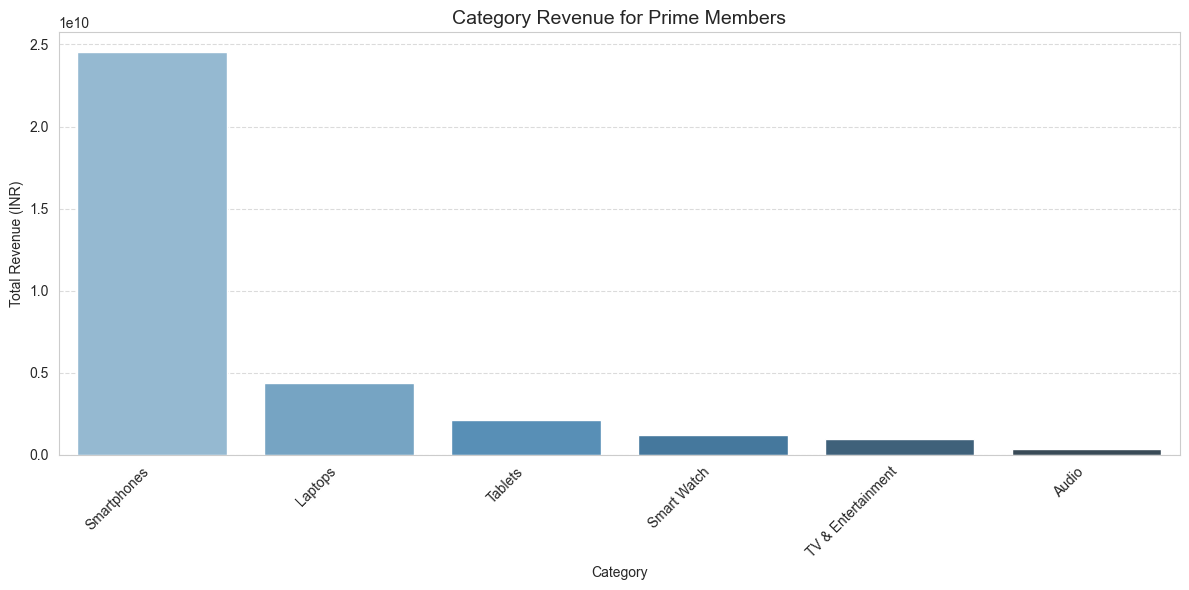

C:\Users\DVK\AppData\Local\Temp\ipykernel_21160\2158802287.py:58: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




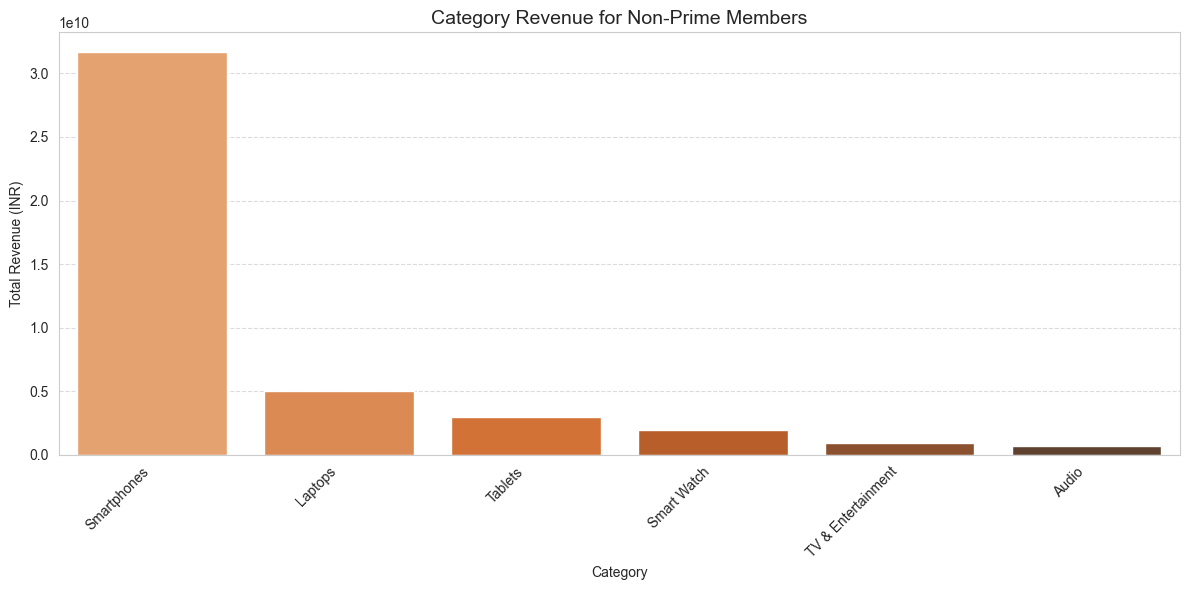

In [6]:
# --- Step 1: Average Order Value (AOV) by Prime Membership ---
aov_df = amazon_india_2015_2025.groupby('is_prime_member')['final_amount_inr'].mean().reset_index(name='average_order_value')
print("Average Order Value by Prime Membership:")
display(aov_df)

# Visualize AOV
plt.figure(figsize=(8, 5))
sns.barplot(x='is_prime_member', y='average_order_value', data=aov_df, palette='coolwarm')
plt.title('Average Order Value: Prime vs Non-Prime', fontsize=14)
plt.xlabel('Prime Member')
plt.ylabel('Average Order Value (INR)')
plt.xticks([0,1], ['Non-Prime', 'Prime'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# --- Step 2: Order Frequency by Prime Membership ---
order_frequency_df = amazon_india_2015_2025.groupby('is_prime_member').size().reset_index(name='order_frequency')
print("\nOrder Frequency by Prime Membership:")
display(order_frequency_df)

# Visualize Order Frequency
plt.figure(figsize=(8, 5))
sns.barplot(x='is_prime_member', y='order_frequency', data=order_frequency_df, palette='coolwarm')
plt.title('Order Frequency: Prime vs Non-Prime', fontsize=14)
plt.xlabel('Prime Member')
plt.ylabel('Number of Orders')
plt.xticks([0,1], ['Non-Prime', 'Prime'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# --- Step 3: Category Preferences ---
category_preferences = amazon_india_2015_2025.groupby(['is_prime_member', 'subcategory'])['final_amount_inr'].sum().reset_index(name='total_revenue')

prime_preferences = category_preferences[category_preferences['is_prime_member'] == True]
non_prime_preferences = category_preferences[category_preferences['is_prime_member'] == False]

print("\nCategory Preferences for Prime Members:")
display(prime_preferences.sort_values('total_revenue', ascending=False))

print("\nCategory Preferences for Non-Prime Members:")
display(non_prime_preferences.sort_values('total_revenue', ascending=False))

# Visualize Category Preferences for Prime Members
plt.figure(figsize=(12, 6))
sns.barplot(x='subcategory', y='total_revenue', data=prime_preferences.sort_values('total_revenue', ascending=False), palette='Blues_d')
plt.title('Category Revenue for Prime Members', fontsize=14)
plt.xlabel('Category')
plt.ylabel('Total Revenue (INR)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Visualize Category Preferences for Non-Prime Members
plt.figure(figsize=(12, 6))
sns.barplot(x='subcategory', y='total_revenue', data=non_prime_preferences.sort_values('total_revenue', ascending=False), palette='Oranges_d')
plt.title('Category Revenue for Non-Prime Members', fontsize=14)
plt.xlabel('Category')
plt.ylabel('Total Revenue (INR)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# 8.

Daily Sales Sample:


,order_date,daily_revenue
0,2015-01-01,5029967.34
1,2015-01-02,4474100.22
2,2015-01-03,5540436.65
3,2015-01-04,5059702.24
4,2015-01-05,6517693.20



Festival vs Non-Festival Summary:


,festival_phase,total_revenue,avg_daily_revenue,order_count
0,During Festival,1.661839e+10,47498.355583,349873
1,Non-Festival,6.027034e+10,77494.596367,777736


C:\Users\DVK\AppData\Local\Temp\ipykernel_21160\616221834.py:57: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




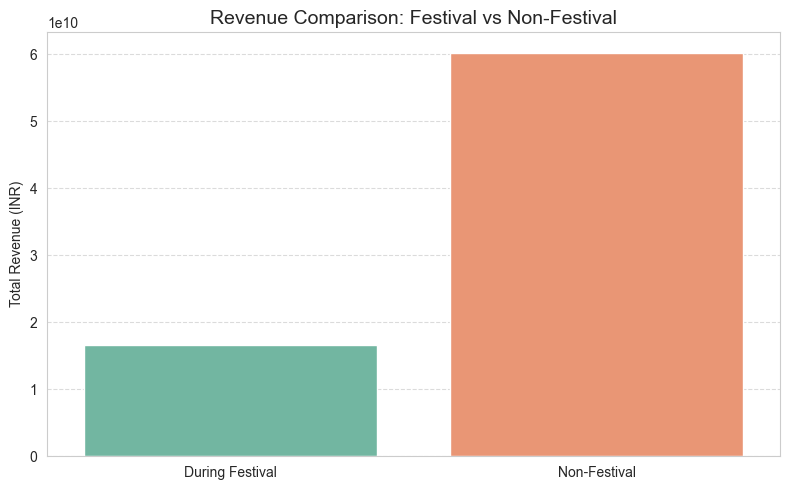

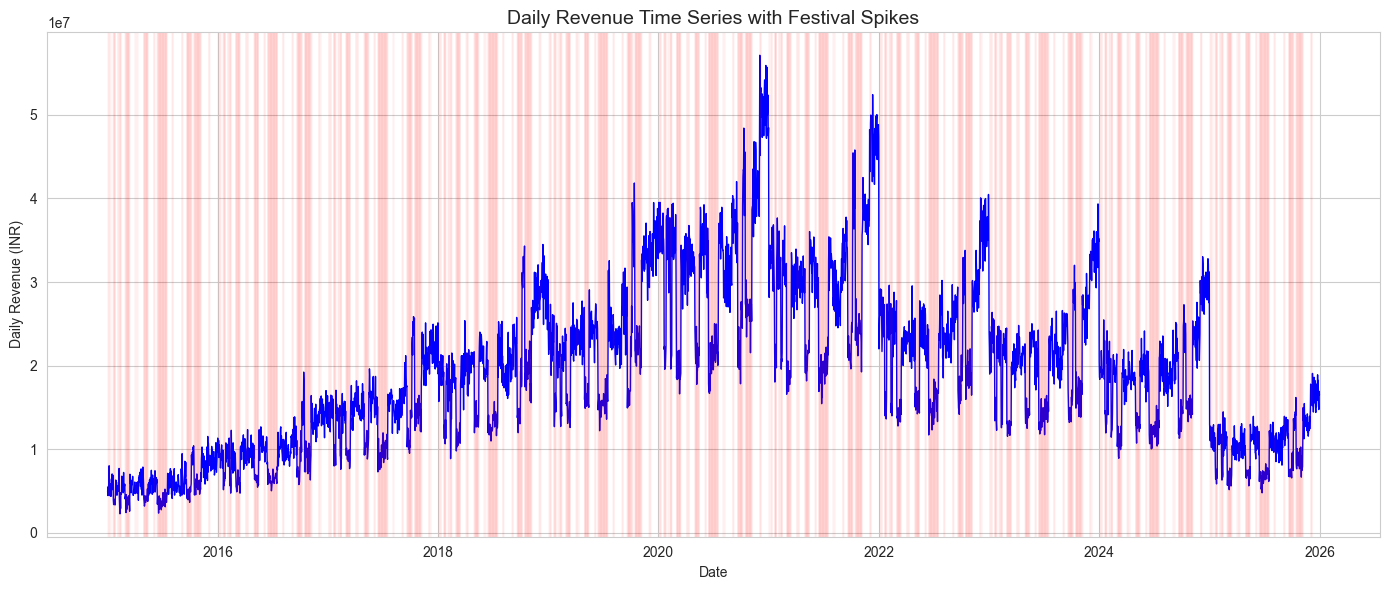

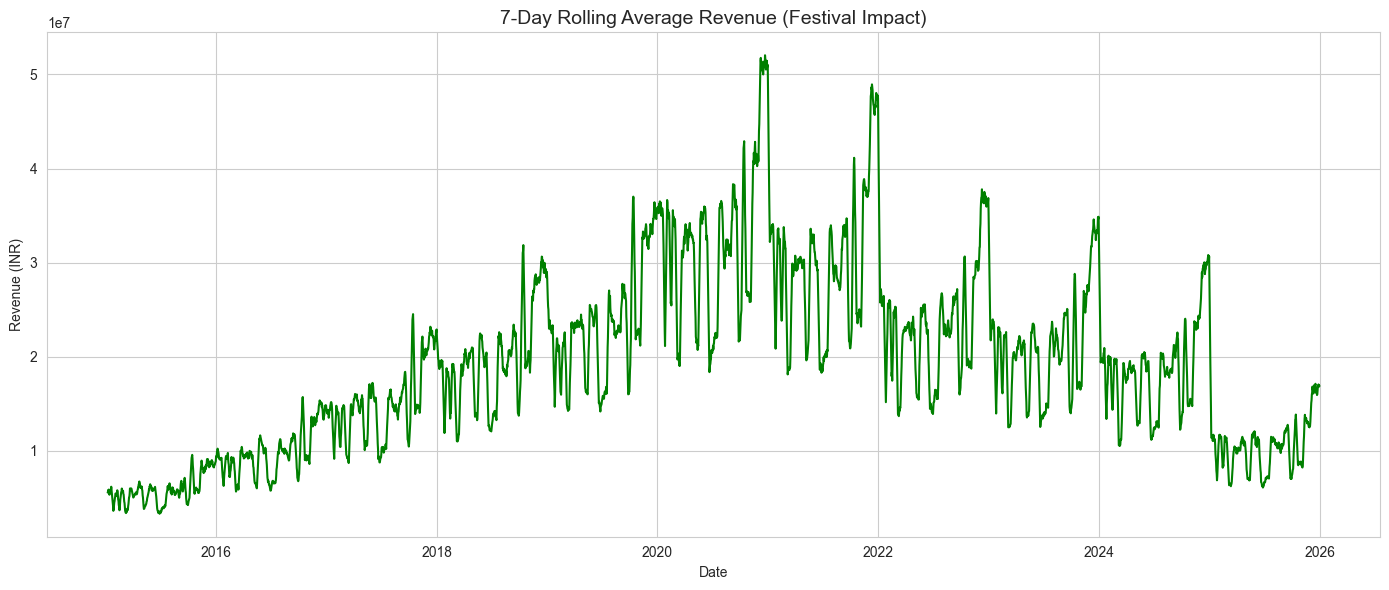


Year-wise Festival Impact:


,year,is_festival_sale,final_amount_inr,Sale_Type
0,2015,False,1.660440e+09,Regular Sales
1,2015,True,4.817230e+08,Festival Sales
2,2016,False,2.799337e+09,Regular Sales
3,2016,True,7.989789e+08,Festival Sales
4,2017,False,4.289465e+09,Regular Sales


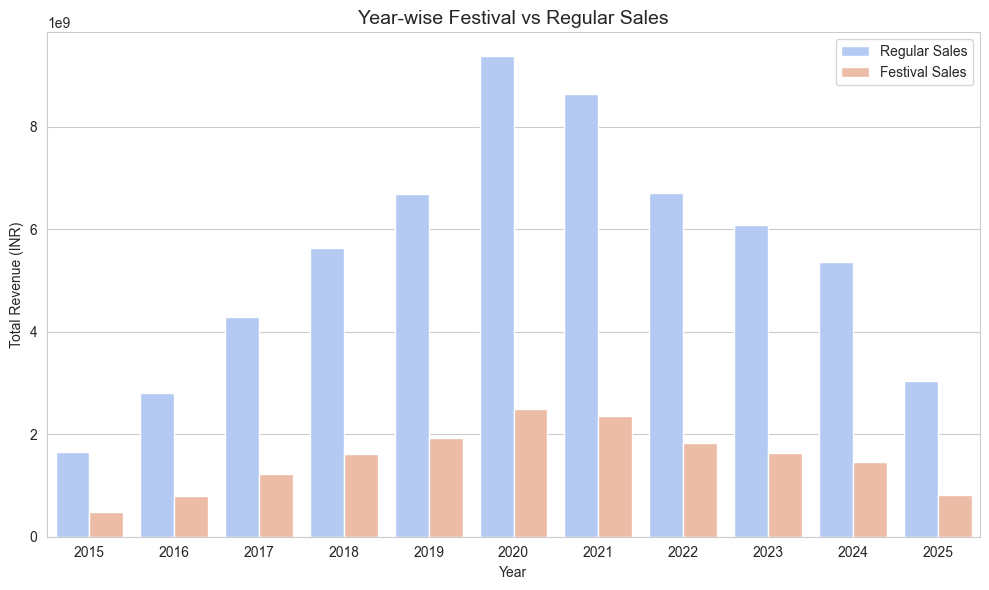

In [13]:
# =========================
# IMPORTS
# =========================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# =========================
# ASSUMPTIONS
# =========================
# df is your cleaned DataFrame
# Required columns:
# order_date_clean (datetime), final_amount_inr, is_festival_sale, year

# Ensure datetime
amazon_india_2015_2025['order_date'] = pd.to_datetime(amazon_india_2015_2025['order_date'])

# =========================
# STEP 1: DAILY REVENUE TIME SERIES
# =========================
daily_sales = (
    amazon_india_2015_2025.groupby('order_date')['final_amount_inr']
    .sum()
    .reset_index(name='daily_revenue')
)

print("Daily Sales Sample:")
display(daily_sales.head())

# =========================
# STEP 2: FESTIVAL FLAG (Before / During / After)
# =========================
# Using is_festival_sale as proxy for Diwali / Prime Day / Other events

amazon_india_2015_2025['festival_phase'] = np.where(
    amazon_india_2015_2025['is_festival_sale'] == True, 'During Festival', 'Non-Festival'
)

festival_summary = (
    amazon_india_2015_2025.groupby('festival_phase')['final_amount_inr']
    .agg(
        total_revenue='sum',
        avg_daily_revenue='mean',
        order_count='count'
    )
    .reset_index()
)

print("\nFestival vs Non-Festival Summary:")
display(festival_summary)

# =========================
# STEP 3: VISUALIZE FESTIVAL IMPACT (BAR)
# =========================
plt.figure(figsize=(8, 5))
sns.barplot(
    x='festival_phase',
    y='total_revenue',
    data=festival_summary,
    palette='Set2'
)
plt.title('Revenue Comparison: Festival vs Non-Festival', fontsize=14)
plt.xlabel('')
plt.ylabel('Total Revenue (INR)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# =========================
# STEP 4: TIME SERIES WITH FESTIVAL SPIKES
# =========================
plt.figure(figsize=(14, 6))
sns.lineplot(
    x='order_date',
    y='daily_revenue',
    data=daily_sales,
    color='blue',
    linewidth=1
)

# Highlight festival days
festival_days = amazon_india_2015_2025[amazon_india_2015_2025['is_festival_sale'] == True]['order_date'].unique()

for day in festival_days:
    plt.axvline(day, color='red', alpha=0.03)

plt.title('Daily Revenue Time Series with Festival Spikes', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Daily Revenue (INR)')
plt.tight_layout()
plt.show()

# =========================
# STEP 5: BEFORE / DURING / AFTER (WINDOW ANALYSIS)
# =========================
# 7-day rolling average to smooth spikes
daily_sales['rolling_7day_avg'] = (
    daily_sales['daily_revenue']
    .rolling(window=7)
    .mean()
)

plt.figure(figsize=(14, 6))
sns.lineplot(
    x='order_date',
    y='rolling_7day_avg',
    data=daily_sales,
    color='green'
)
plt.title('7-Day Rolling Average Revenue (Festival Impact)', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Revenue (INR)')
plt.tight_layout()
plt.show()

# =========================
# STEP 6: YEAR-WISE FESTIVAL IMPACT (FIXED)
# =========================

# Create year column (IMPORTANT)
amazon_india_2015_2025['year'] = amazon_india_2015_2025['order_date'].dt.year

festival_yearly = (
    amazon_india_2015_2025.groupby(['year', 'is_festival_sale'])['final_amount_inr']
    .sum()
    .reset_index()
)

festival_yearly['Sale_Type'] = festival_yearly['is_festival_sale'].map({
    True: 'Festival Sales',
    False: 'Regular Sales'
})

print("\nYear-wise Festival Impact:")
display(festival_yearly.head())

plt.figure(figsize=(10, 6))
sns.barplot(
    x='year',
    y='final_amount_inr',
    hue='Sale_Type',
    data=festival_yearly,
    palette='coolwarm'
)
plt.title('Year-wise Festival vs Regular Sales', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Total Revenue (INR)')
plt.legend(title='')
plt.tight_layout()
plt.show()


# 9. 

Customer Distribution by Age Group:


,customer_age_group,customer_count
1,26-35,347899
0,18-25,316424
2,36-45,199100
5,Unknown,135315
3,46-55,99012
4,55+,29859


C:\Users\DVK\AppData\Local\Temp\ipykernel_21160\288785701.py:30: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




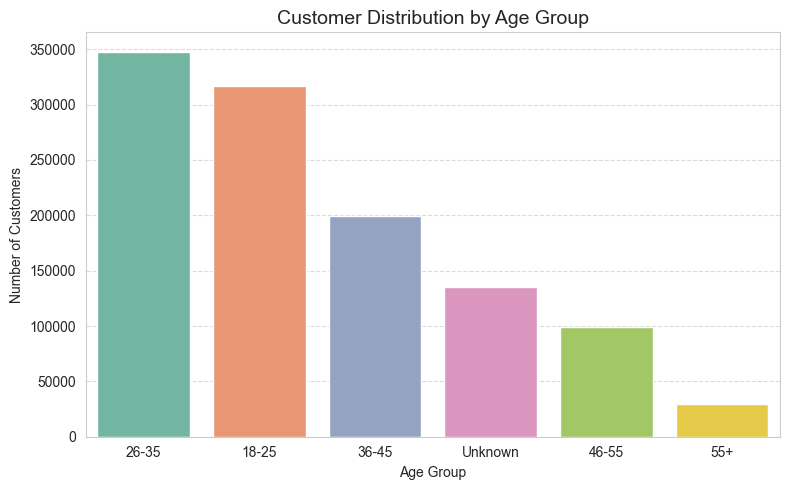


Spending Pattern by Age Group:


,customer_age_group,total_spent,avg_order_value
1,26-35,2.379305e+10,68390.679847
0,18-25,2.158446e+10,68213.728864
2,36-45,1.354666e+10,68039.481598
5,Unknown,9.204545e+09,68023.094850
3,46-55,6.738818e+09,68060.619683
4,55+,2.021196e+09,67691.334308


C:\Users\DVK\AppData\Local\Temp\ipykernel_21160\288785701.py:60: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




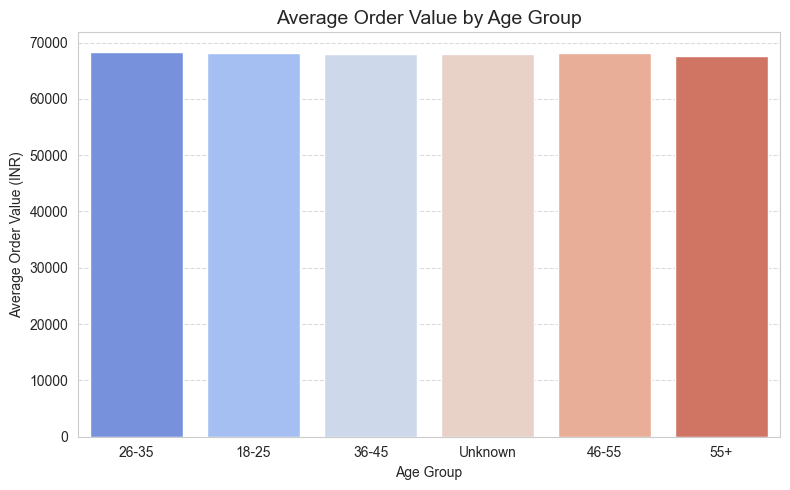


Shopping Frequency by Age Group:


,customer_age_group,order_frequency
1,26-35,347899
0,18-25,316424
2,36-45,199100
5,Unknown,135315
3,46-55,99012
4,55+,29859


C:\Users\DVK\AppData\Local\Temp\ipykernel_21160\288785701.py:87: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




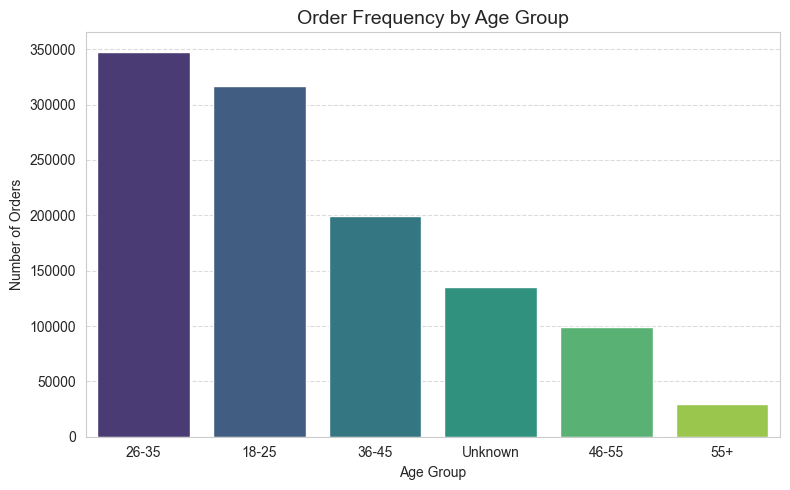


Category Preferences by Age Group (Sample):


,customer_age_group,category,total_revenue
0,18-25,Electronics,2.157986e+10
1,18-25,Electronics & Accessories,4.604904e+06
2,26-35,Electronics,2.378844e+10
3,26-35,Electronics & Accessories,4.613466e+06
4,36-45,Electronics,1.354481e+10
5,36-45,Electronics & Accessories,1.851200e+06
6,46-55,Electronics,6.737467e+09
7,46-55,Electronics & Accessories,1.351269e+06
8,55+,Electronics,2.020611e+09
9,55+,Electronics & Accessories,5.842787e+05


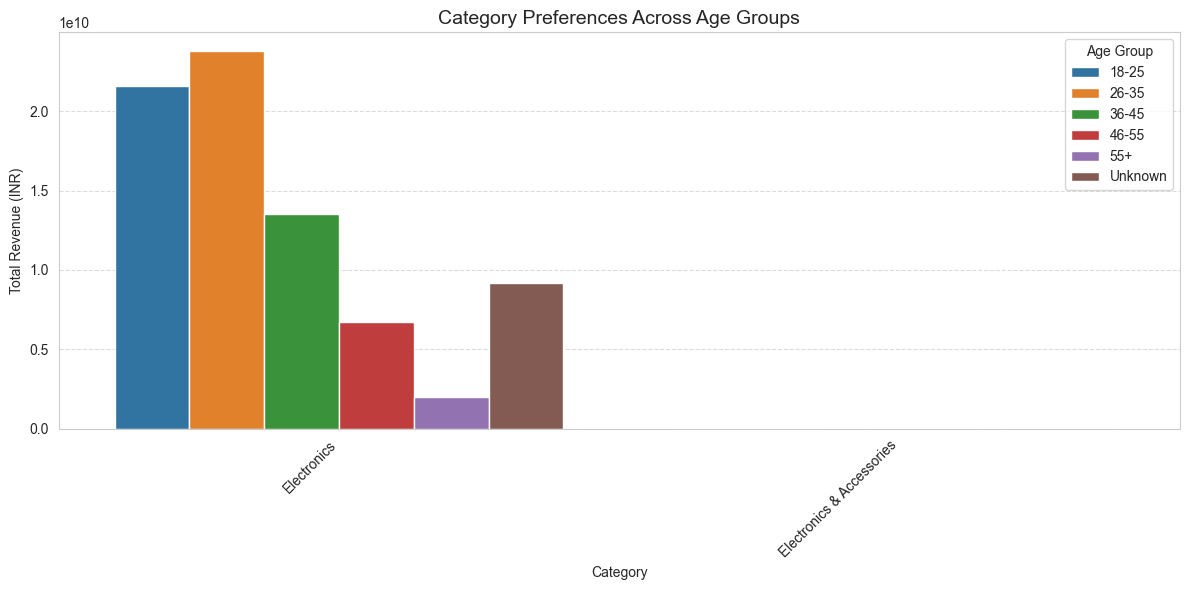

In [14]:
# =========================
# IMPORTS
# =========================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# =========================
# ASSUMPTIONS
# =========================
# df = cleaned DataFrame
# Required columns:
# customer_age_group, final_amount_inr, transaction_id, category

# =========================
# STEP 1: BASIC AGE GROUP DISTRIBUTION
# =========================
age_distribution = (
    amazon_india_2015_2025.groupby('customer_age_group')
    .size()
    .reset_index(name='customer_count')
    .sort_values('customer_count', ascending=False)
)

print("Customer Distribution by Age Group:")
display(age_distribution)

plt.figure(figsize=(8, 5))
sns.barplot(
    x='customer_age_group',
    y='customer_count',
    data=age_distribution,
    palette='Set2'
)
plt.title('Customer Distribution by Age Group', fontsize=14)
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# =========================
# STEP 2: SPENDING PATTERN BY AGE GROUP
# =========================
age_spending = (
    amazon_india_2015_2025.groupby('customer_age_group')['final_amount_inr']
    .agg(
        total_spent='sum',
        avg_order_value='mean'
    )
    .reset_index()
    .sort_values('total_spent', ascending=False)
)

print("\nSpending Pattern by Age Group:")
display(age_spending)

plt.figure(figsize=(8, 5))
sns.barplot(
    x='customer_age_group',
    y='avg_order_value',
    data=age_spending,
    palette='coolwarm'
)
plt.title('Average Order Value by Age Group', fontsize=14)
plt.xlabel('Age Group')
plt.ylabel('Average Order Value (INR)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# =========================
# STEP 3: SHOPPING FREQUENCY BY AGE GROUP
# =========================
age_frequency = (
    amazon_india_2015_2025.groupby('customer_age_group')
    .agg(order_frequency=('transaction_id', 'count'))
    .reset_index()
    .sort_values('order_frequency', ascending=False)
)

print("\nShopping Frequency by Age Group:")
display(age_frequency)

plt.figure(figsize=(8, 5))
sns.barplot(
    x='customer_age_group',
    y='order_frequency',
    data=age_frequency,
    palette='viridis'
)
plt.title('Order Frequency by Age Group', fontsize=14)
plt.xlabel('Age Group')
plt.ylabel('Number of Orders')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# =========================
# STEP 4: CATEGORY PREFERENCES BY AGE GROUP
# =========================
age_category_pref = (
    amazon_india_2015_2025.groupby(['customer_age_group', 'category'])['final_amount_inr']
    .sum()
    .reset_index(name='total_revenue')
)

print("\nCategory Preferences by Age Group (Sample):")
display(age_category_pref.head(10))

plt.figure(figsize=(12, 6))
sns.barplot(
    x='category',
    y='total_revenue',
    hue='customer_age_group',
    data=age_category_pref,
    palette='tab10'
)
plt.title('Category Preferences Across Age Groups', fontsize=14)
plt.xlabel('Category')
plt.ylabel('Total Revenue (INR)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Age Group')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


#10. 

Price vs Demand Sample:


,discounted_price_inr,quantity,category,customer_tier
0,21442.59,1,Electronics,Metro
1,32907.49,3,Electronics,Tier2
2,36741.38,1,Electronics,Metro
3,96456.27,1,Electronics,Metro
4,25970.76,1,Electronics,Tier2


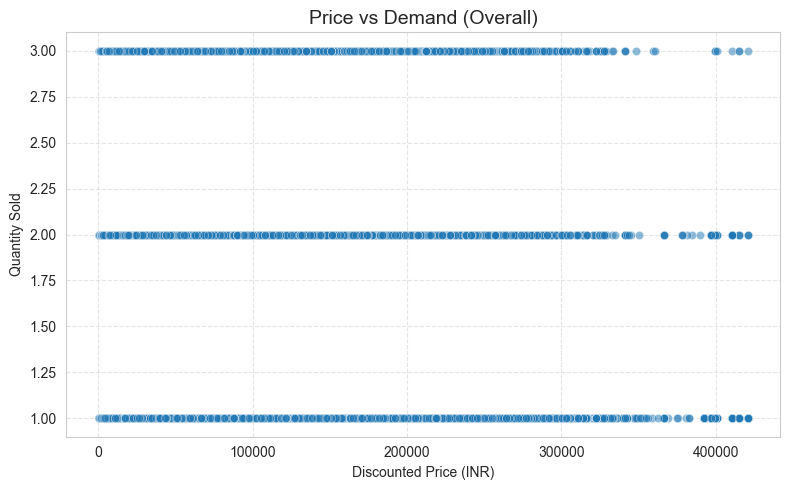


Correlation Matrix (Price vs Demand):


,discounted_price_inr,quantity
discounted_price_inr,1.000000,0.000297
quantity,0.000297,1.000000


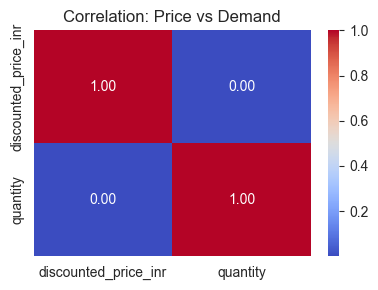

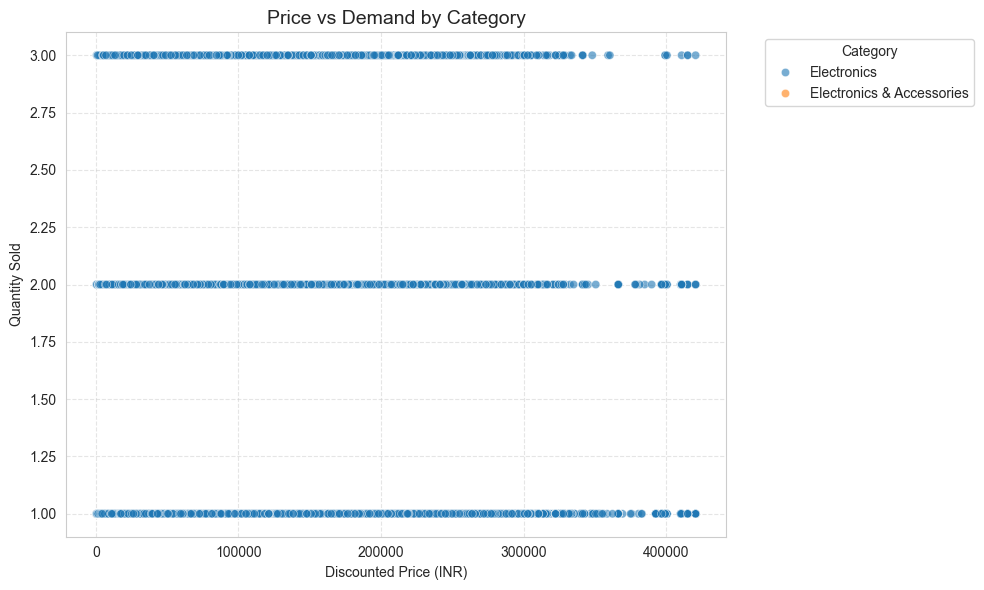

C:\Users\DVK\AppData\Local\Temp\ipykernel_21160\42132400.py:100: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.

C:\Users\DVK\AppData\Roaming\Python\Python314\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



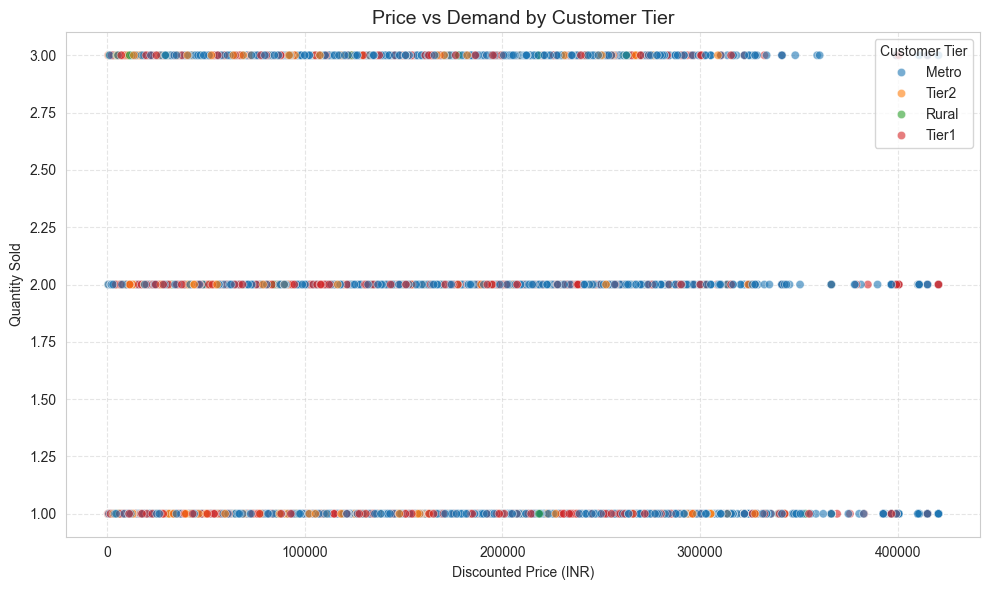


Average Price & Demand by Category:


,category,avg_price,avg_quantity
0,Electronics,54542.162043,1.250058
1,Electronics & Accessories,50287.902890,1.275229


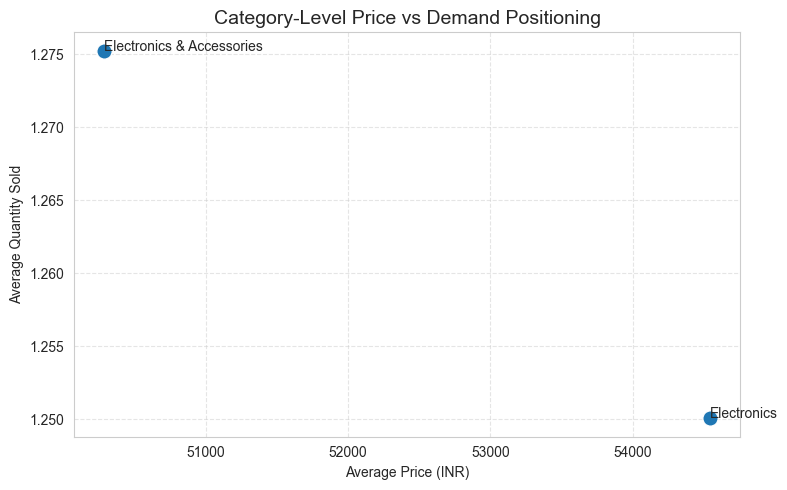

In [15]:
# =========================
# IMPORTS
# =========================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# =========================
# ASSUMPTIONS
# =========================
# df = cleaned DataFrame
# Required columns:
# discounted_price_inr, quantity, category, customer_tier

# =========================
# STEP 1: BASIC PRICE vs DEMAND DATA
# =========================
price_demand_df = amazon_india_2015_2025[[
    'discounted_price_inr',
    'quantity',
    'category',
    'customer_tier'
]].dropna()

print("Price vs Demand Sample:")
display(price_demand_df.head())

# =========================
# STEP 2: OVERALL PRICE vs DEMAND (SCATTER)
# =========================
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x='discounted_price_inr',
    y='quantity',
    data=price_demand_df,
    alpha=0.5
)
plt.title('Price vs Demand (Overall)', fontsize=14)
plt.xlabel('Discounted Price (INR)')
plt.ylabel('Quantity Sold')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# =========================
# STEP 3: CORRELATION ANALYSIS (PRICE vs QUANTITY)
# =========================
corr_value = price_demand_df[['discounted_price_inr', 'quantity']].corr()

print("\nCorrelation Matrix (Price vs Demand):")
display(corr_value)

plt.figure(figsize=(4, 3))
sns.heatmap(
    corr_value,
    annot=True,
    cmap='coolwarm',
    fmt='.2f'
)
plt.title('Correlation: Price vs Demand')
plt.tight_layout()
plt.show()

# =========================
# STEP 4: CATEGORY-WISE PRICE vs DEMAND
# =========================
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='discounted_price_inr',
    y='quantity',
    hue='category',
    data=price_demand_df,
    alpha=0.6
)
plt.title('Price vs Demand by Category', fontsize=14)
plt.xlabel('Discounted Price (INR)')
plt.ylabel('Quantity Sold')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# =========================
# STEP 5: CUSTOMER SEGMENT (TIER) ANALYSIS
# =========================
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='discounted_price_inr',
    y='quantity',
    hue='customer_tier',
    data=price_demand_df,
    alpha=0.6
)
plt.title('Price vs Demand by Customer Tier', fontsize=14)
plt.xlabel('Discounted Price (INR)')
plt.ylabel('Quantity Sold')
plt.legend(title='Customer Tier')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# =========================
# STEP 6: AVG PRICE & DEMAND BY CATEGORY (SUMMARY)
# =========================
category_summary = (
    price_demand_df
    .groupby('category')
    .agg(
        avg_price=('discounted_price_inr', 'mean'),
        avg_quantity=('quantity', 'mean')
    )
    .reset_index()
)

print("\nAverage Price & Demand by Category:")
display(category_summary)

plt.figure(figsize=(8, 5))
sns.scatterplot(
    x='avg_price',
    y='avg_quantity',
    data=category_summary,
    s=120
)
for i, txt in enumerate(category_summary['category']):
    plt.text(
        category_summary['avg_price'][i],
        category_summary['avg_quantity'][i],
        txt
    )
plt.title('Category-Level Price vs Demand Positioning', fontsize=14)
plt.xlabel('Average Price (INR)')
plt.ylabel('Average Quantity Sold')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# 11. 

Delivery Days Distribution:


count    1.120773e+06
mean     3.333510e+00
std      1.755351e+00
min      0.000000e+00
25%      2.000000e+00
50%      3.000000e+00
75%      4.000000e+00
max      1.500000e+01
Name: delivery_days, dtype: float64

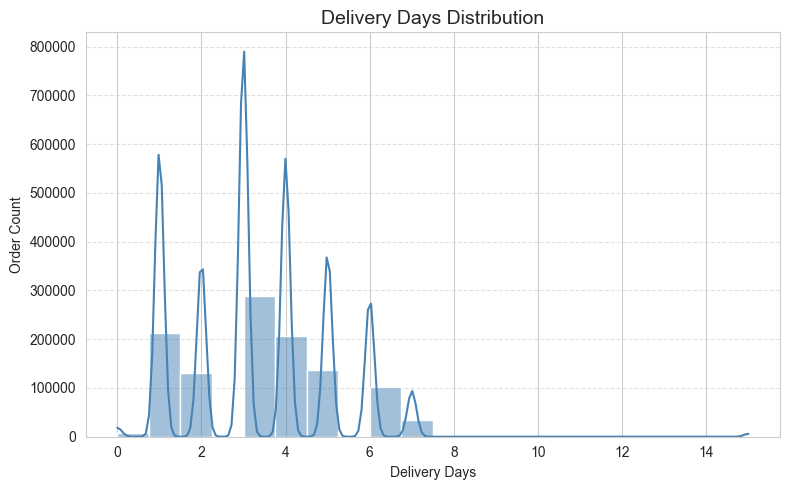


On-Time vs Delayed Orders:


,on_time_delivery,order_count,Delivery_Status
0,False,145795,Delayed
1,True,981814,On-Time


C:\Users\DVK\AppData\Local\Temp\ipykernel_21160\891102513.py:58: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




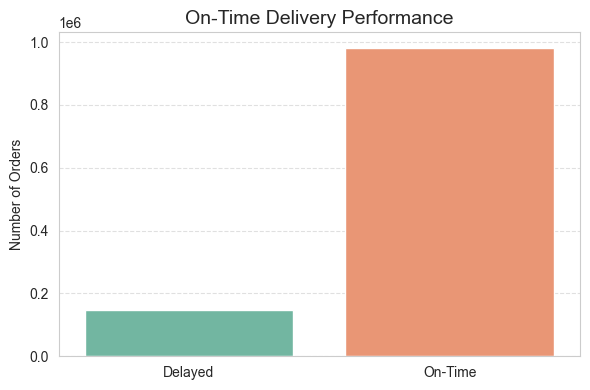


Customer Rating by Delivery Days:


,delivery_days,avg_rating
0,0.0,3.980066
1,1.0,3.975098
2,2.0,3.977379
3,3.0,3.975368
4,4.0,3.974993


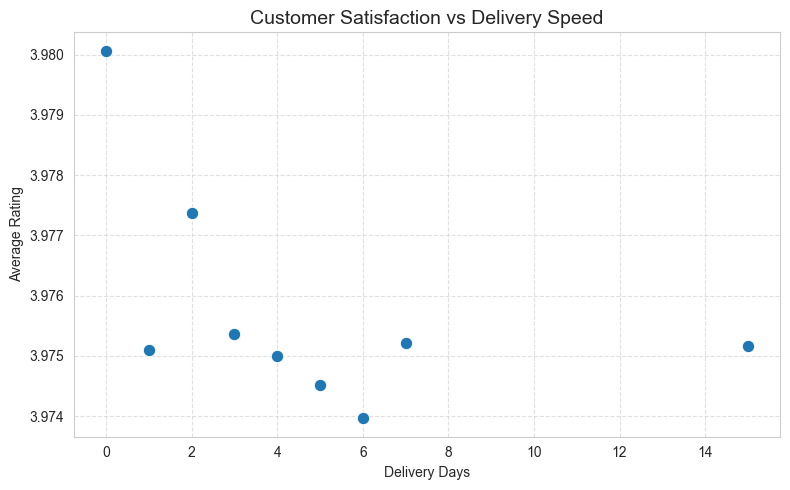


Top Cities: Delivery Performance:


,customer_city,avg_delivery_days,order_count
21,Mumbai,3.373735,140787
9,Delhi,3.369641,122703
3,Bangalore,3.369114,101944
7,Chennai,3.369390,84220
24,Pune,3.239537,67284
16,Kolkata,3.366953,66488
0,Ahmedabad,3.247695,50534
11,Hyderabad,3.365987,44354
13,Jaipur,3.239944,40201
26,Surat,3.249826,40128


C:\Users\DVK\AppData\Local\Temp\ipykernel_21160\891102513.py:115: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




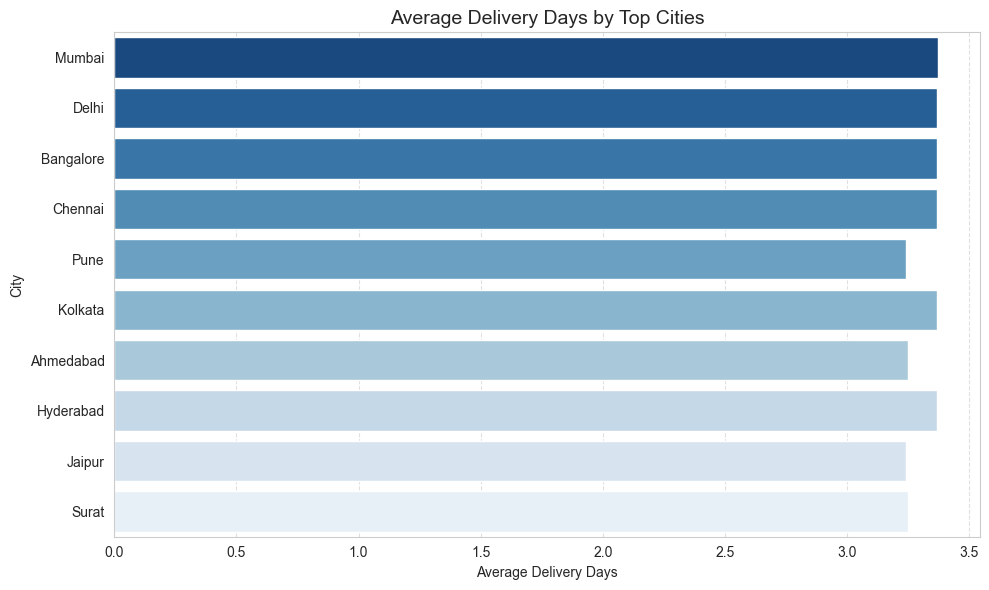


Delivery Performance by Customer Tier:


,customer_tier,avg_delivery_days,on_time_rate,on_time_rate_%
0,Metro,3.369928,0.867722,86.77
1,Rural,3.467079,0.860998,86.10
2,Tier1,3.247393,0.877371,87.74
3,Tier2,3.344618,0.870185,87.02


C:\Users\DVK\AppData\Local\Temp\ipykernel_21160\891102513.py:146: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




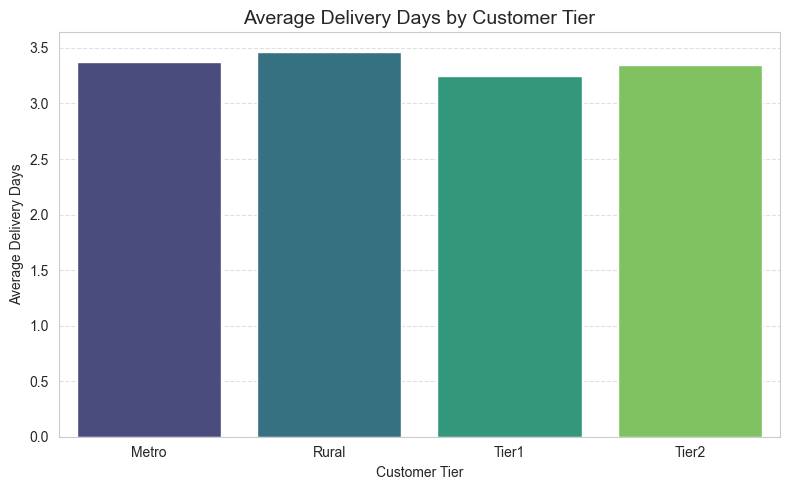

In [16]:
# =========================
# IMPORTS
# =========================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# =========================
# DATAFRAME
# =========================
df = amazon_india_2015_2025

# Required columns:
# delivery_days, product_rating, customer_city, customer_tier

# =========================
# STEP 1: DELIVERY DAYS DISTRIBUTION
# =========================
print("Delivery Days Distribution:")
display(df['delivery_days'].describe())

plt.figure(figsize=(8, 5))
sns.histplot(
    df['delivery_days'],
    bins=20,
    kde=True,
    color='steelblue'
)
plt.title('Delivery Days Distribution', fontsize=14)
plt.xlabel('Delivery Days')
plt.ylabel('Order Count')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# =========================
# STEP 2: ON-TIME DELIVERY PERFORMANCE
# =========================
# Define on-time delivery (≤ 5 days)
df['on_time_delivery'] = df['delivery_days'] <= 5

on_time_summary = (
    df.groupby('on_time_delivery')
    .size()
    .reset_index(name='order_count')
)

on_time_summary['Delivery_Status'] = on_time_summary['on_time_delivery'].map({
    True: 'On-Time',
    False: 'Delayed'
})

print("\nOn-Time vs Delayed Orders:")
display(on_time_summary)

plt.figure(figsize=(6, 4))
sns.barplot(
    x='Delivery_Status',
    y='order_count',
    data=on_time_summary,
    palette='Set2'
)
plt.title('On-Time Delivery Performance', fontsize=14)
plt.xlabel('')
plt.ylabel('Number of Orders')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# =========================
# STEP 3: CUSTOMER SATISFACTION vs DELIVERY SPEED
# =========================
delivery_rating = (
    df.groupby('delivery_days')['product_rating']
    .mean()
    .reset_index(name='avg_rating')
)

print("\nCustomer Rating by Delivery Days:")
display(delivery_rating.head())

plt.figure(figsize=(8, 5))
sns.scatterplot(
    x='delivery_days',
    y='avg_rating',
    data=delivery_rating,
    s=80
)
plt.title('Customer Satisfaction vs Delivery Speed', fontsize=14)
plt.xlabel('Delivery Days')
plt.ylabel('Average Rating')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# =========================
# STEP 4: CITY-WISE DELIVERY PERFORMANCE (TOP 10)
# =========================
city_delivery = (
    df.groupby('customer_city')
    .agg(
        avg_delivery_days=('delivery_days', 'mean'),
        order_count=('delivery_days', 'count')
    )
    .reset_index()
    .sort_values('order_count', ascending=False)
    .head(10)
)

print("\nTop Cities: Delivery Performance:")
display(city_delivery)

plt.figure(figsize=(10, 6))
sns.barplot(
    x='avg_delivery_days',
    y='customer_city',
    data=city_delivery,
    palette='Blues_r'
)
plt.title('Average Delivery Days by Top Cities', fontsize=14)
plt.xlabel('Average Delivery Days')
plt.ylabel('City')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# =========================
# STEP 5: CUSTOMER TIER vs DELIVERY PERFORMANCE
# =========================
tier_delivery = (
    df.groupby('customer_tier')
    .agg(
        avg_delivery_days=('delivery_days', 'mean'),
        on_time_rate=('on_time_delivery', 'mean')
    )
    .reset_index()
)

tier_delivery['on_time_rate_%'] = (tier_delivery['on_time_rate'] * 100).round(2)

print("\nDelivery Performance by Customer Tier:")
display(tier_delivery)

plt.figure(figsize=(8, 5))
sns.barplot(
    x='customer_tier',
    y='avg_delivery_days',
    data=tier_delivery,
    palette='viridis'
)
plt.title('Average Delivery Days by Customer Tier', fontsize=14)
plt.xlabel('Customer Tier')
plt.ylabel('Average Delivery Days')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
